<a href="https://colab.research.google.com/github/surajpandey11/Startup_funding_prediction/blob/main/Copy_of_Startup_Funding_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
startup_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4/Week 4/Day 1/Copy of data_driven_investment_1.csv')

In [5]:
startup_df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


In [6]:
startup_df.shape

(1502175, 20)

In [7]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502175 entries, 0 to 1502174
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1500693 non-null  object 
 1   month                 1502175 non-null  int64  
 2   Application Category  1502175 non-null  object 
 3   Avg_Session_Time      877732 non-null   float64
 4   Business Models       2414 non-null     object 
 5   City                  2407 non-null     object 
 6   Company Stage         2414 non-null     object 
 7   Feed Name             2414 non-null     object 
 8   Founded Year          2414 non-null     float64
 9   Latest Funded Date    2414 non-null     object 
 10  MAU                   118087 non-null   float64
 11  Open_Rate             877715 non-null   float64
 12  Overview              2414 non-null     object 
 13  Practice Areas        2414 non-null     object 
 14  Reach                 1050875 non-

In [8]:
startup_df['Application Category'].value_counts()

Education                  202514
Tools                      139262
Business                    87780
Books & Reference           85189
Entertainment               76582
Productivity                63135
Personalization             62694
Finance                     60828
Photography                 56762
Music & Audio               55885
Lifestyle                   53462
Social                      38896
Communication               37143
Travel & Local              37100
Health & Fitness            36996
Shopping                    31776
Simulation                  29967
News & Magazines            27598
Casual                      25771
Action                      24972
Video Players & Editors     24309
Puzzle                      24304
Sports                      20217
Arcade                      18639
Medical                     17691
Educational                 14675
Food & Drink                14230
Maps & Navigation           14028
Racing                      13608
Adventure     

In [9]:
startup_df['Business Models'].value_counts()

Social Platforms > Interest Based > Education > Higher Education > Q&A Platforms\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced                                                                              232
OTT Video > OTT Streaming Platforms > Video On Demand (VOD) > News                                                                                                                                                                 124
K-12 EdTech > B2C Learning Solutions > School Curriculum > Multi Subject > Horizontal\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced\nY Combinator Batches > 2020 > Winter                                   117
Food & Beverage Products > Beverages > Juices and Dilutables > Juices > Cold-pressed                                                                                                                                               113
Influencer E-Commerce > Live Video\nVideo Commerce > Live Stream Commerce   

In [10]:
startup_df['funding_ind'].value_counts()

0    1499761
1       2414
Name: funding_ind, dtype: int64

In [11]:
startup_df['UUID'].value_counts()

4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2671
a8febb4b767f83022235f3f34a2241ed1e13db2f    1778
524889f05a60933210abde13d9db9211986698ac    1575
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1531
10a07f3aa16935a1b5a79c0d19bf5e4044cd5f21    1282
                                            ... 
642b341aeba9a1ff4d464c64a6332758e61ac10d       1
cabba8b64335f1fa5cece5aa0987abd3d6a4e1a1       1
a658c22cd8268ecaf80466d6fc1050bd89234727       1
e6b01f4d0fb0ff3b95cb8bf282f9d4ab31f3be03       1
bc32edd474047e792b170cc2c1d179ea001fe5ea       1
Name: UUID, Length: 147741, dtype: int64

In [64]:
def datetime(x):
  import datetime
  x=str(x)
  a=int(x[0:4])
  b=int(x[4:6])
  c=int(x[6:])
  

  x = datetime.datetime(a, b, c)
  x.strftime("%Y %b %d")

  return x

In [65]:
startup_df['Month']=startup_df['month'].apply(lambda x:datetime(x))

In [66]:
startup_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0,2018-08-01
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0,2018-08-01
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0,2018-08-01
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0,2018-08-01
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502170,edea27844070caa246be7a15b4127b8f9f4f9bc5,20190101,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,1.000000,0,2019-01-01
1502171,90b4546ebf64e49398e76af33073e8d97e66ecf9,20190101,Video Players & Editors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,0.000000,0,2019-01-01
1502172,53ad9d220cb359aef863b9dab2de3e5ce65ef6e1,20190101,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,1.000000,0,2019-01-01
1502173,83016b735683928472e8043a51e5f9932e79db09,20190101,Tools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National,NaN,NaN,0.000000,0,2019-01-01


In [67]:
partcular_df=startup_df[startup_df['UUID']== '4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27']

In [68]:
partcular_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month
1525,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20180801,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000585,National,NaN,NaN,0.206667,0,2018-08-01
2432,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001211,National,NaN,NaN,0.116183,0,2018-08-01
2433,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000104,National,NaN,NaN,0.333333,0,2018-08-01
2434,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20180801,Communication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000262,National,NaN,NaN,0.085106,0,2018-08-01
4238,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20180801,Photography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004756,National,NaN,NaN,0.072319,0,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492313,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20190101,Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000857,National,NaN,NaN,0.004444,0,2019-01-01
1492314,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20190101,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000080,National,NaN,NaN,0.192308,0,2019-01-01
1492315,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20190101,Tools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011600,National,NaN,NaN,0.002427,0,2019-01-01
1495432,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,20190101,Photography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034384,National,NaN,NaN,0.088980,0,2019-01-01


In [69]:
partcular_df['funding_ind'].value_counts()

0    2671
Name: funding_ind, dtype: int64

KeyError: ignored

In [16]:
a=startup_df.groupby('UUID')

In [70]:
funded_df=startup_df[startup_df['funding_ind']==1]

In [71]:
funded_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month
147,0de5c3fb8362718a71754d77061259c809266dd1,20180801,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,National,4087427.0,NaN,0.250000,1,2018-08-01
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1,2018-08-01
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1,2018-08-01
2624,9d17e60de4c6bb504d258872b6cc0bffd09de171,20180801,Travel & Local,NaN,Online Travel > Transportation > Train > Onlin...,Bangalore,Seed,Online Travel,2014.0,2018-11-01,NaN,NaN,Online platform to book train tickets in India,Consumer\nTravel and Hospitality Tech,0.995227,National,1156045.0,NaN,NaN,1,2018-08-01
3374,7c3e0d6bec30478fb1e04249ac2e13016cf9c8db,20180801,Business,NaN,HRTech > HRMS > Suite > Enterprise\nCross Bord...,Gurgaon,Seed,HRTech\nCross Border - India,1995.0,2018-10-01,NaN,NaN,SaaS based Human Resource Management,Enterprise Applications\nGeo - India Tech,0.000161,National,34444.0,NaN,0.100000,1,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500587,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000074,National,14634837.0,NaN,0.078947,1,2019-01-01
1500588,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000105,National,14634837.0,NaN,0.102041,1,2019-01-01
1500589,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000061,National,14634837.0,NaN,0.114286,1,2019-01-01
1500590,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000365,National,14634837.0,NaN,0.077348,1,2019-01-01


In [72]:
funded_df['Practice Areas'].value_counts()

FinTech                                    306
Consumer\nMedia & Entertainment\nEdTech    233
Media & Entertainment                      133
EdTech\nEdTech\nAccelerator Batches        120
Consumer                                   117
                                          ... 
Consumer\nEdTech\nEdTech                     1
HealthTech\nEdTech\nEducation                1
EdTech\nAccelerator Batches                  1
HealthTech\nCovid-19\nConsumer               1
FinTech\nAgriculture                         1
Name: Practice Areas, Length: 132, dtype: int64

In [73]:
funded_df['City'].value_counts()

Bangalore                   686
Gurgaon                     526
Delhi                       475
Mumbai                      356
Kingstown\nMumbai           107
Pune                         69
Noida                        35
Hyderabad                    31
San Mateo\nChennai           21
Chennai                      21
Ahmedabad                    16
Kolkata                       7
Jaipur                        7
Kota                          6
Dublin\nBangalore             6
Singapore\nGurgaon            5
Bangalore\nMumbai             3
London                        3
San Francisco\nBangalore      3
Panaji                        3
Coimbatore                    3
Hangzhou\nDelhi               3
Singapore\nBangalore          3
Bhopal                        3
Kochi                         2
Fremont\nMumbai               2
Chicago\nNoida                2
Faridabad                     1
Kanpur                        1
London\nNoida                 1
Name: City, dtype: int64

In [20]:
a=list(funded_df['UUID'])

In [74]:
funded_particular_df=startup_df[startup_df['UUID']== '30274688a665c39d0b9691836e24e2fb9afce6fe']

In [75]:
funded_particular_df

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month
11790,30274688a665c39d0b9691836e24e2fb9afce6fe,20180801,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000109,National,NaN,NaN,0.074074,0,2018-08-01
11791,30274688a665c39d0b9691836e24e2fb9afce6fe,20180801,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000212,National,NaN,NaN,0.103448,0,2018-08-01
11792,30274688a665c39d0b9691836e24e2fb9afce6fe,20180801,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000139,National,NaN,NaN,0.142857,0,2018-08-01
11793,30274688a665c39d0b9691836e24e2fb9afce6fe,20180801,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000085,National,NaN,NaN,0.000000,0,2018-08-01
11794,30274688a665c39d0b9691836e24e2fb9afce6fe,20180801,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000126,National,NaN,NaN,0.052632,0,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500586,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000067,National,14634837.0,NaN,0.068966,1,2019-01-01
1500587,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000074,National,14634837.0,NaN,0.078947,1,2019-01-01
1500588,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000105,National,14634837.0,NaN,0.102041,1,2019-01-01
1500589,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000061,National,14634837.0,NaN,0.114286,1,2019-01-01


In [76]:
funded_particular_df = funded_particular_df.sort_values('Month')

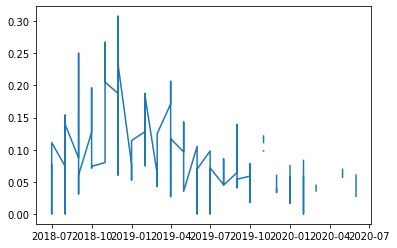

In [77]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(funded_particular_df['Month'],funded_particular_df['Uninstall_Rate'])

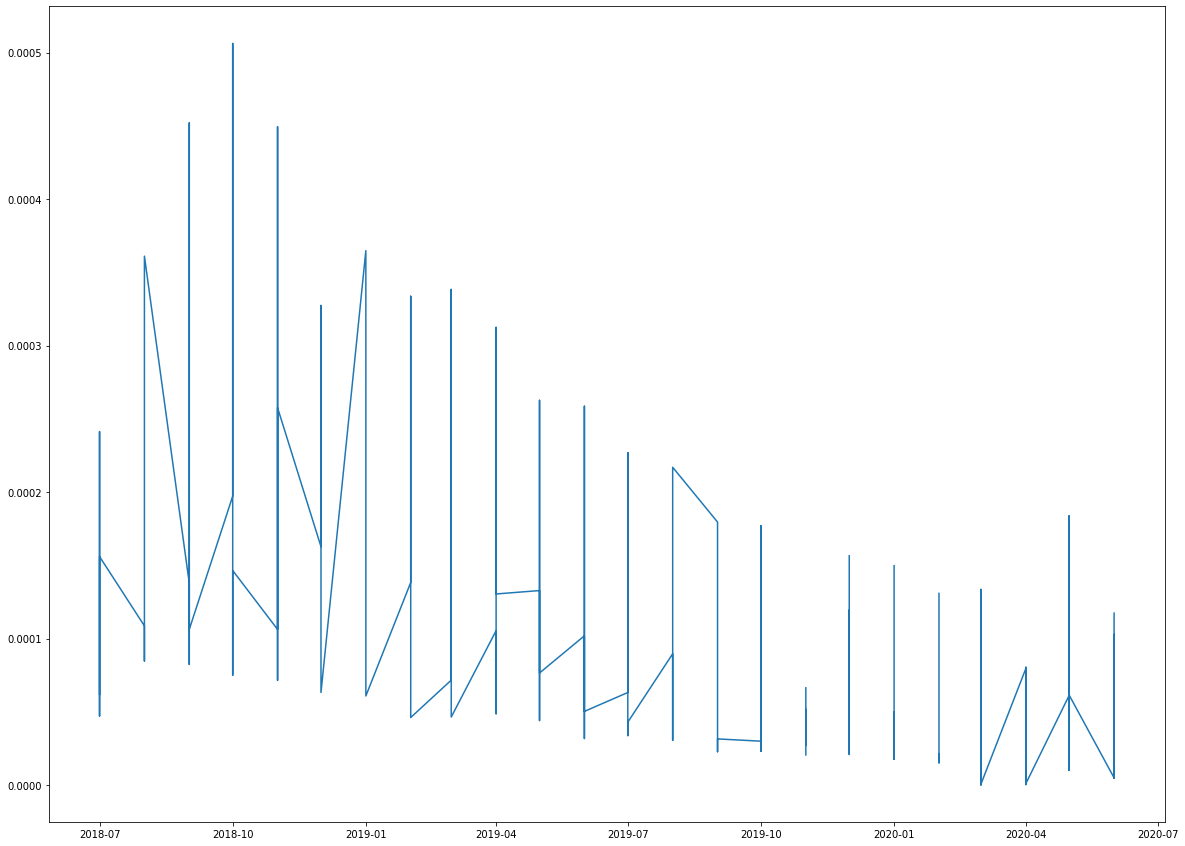

In [81]:
plt.figure(figsize=(20,15))
plt.plot(funded_particular_df['Month'],(funded_particular_df['Reach']))

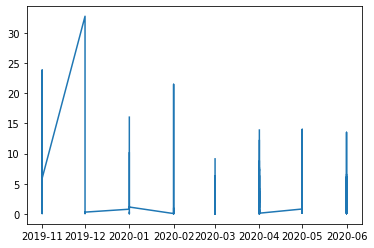

In [79]:
plt.plot(funded_particular_df['Month'],funded_particular_df['Avg_Session_Time'])

In [25]:
funded_particular_df_1=startup_df[startup_df['UUID']== 'cae68bf26bf59549fac77ec044954f939ab28c28']

In [26]:
funded_particular_df_1

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1
16032,cae68bf26bf59549fac77ec044954f939ab28c28,20190601,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000067,National,NaN,NaN,0.060000,0
32011,cae68bf26bf59549fac77ec044954f939ab28c28,20191201,Finance,0.477411,NaN,NaN,NaN,NaN,NaN,NaN,0.428571,1.438095,NaN,NaN,0.000039,National,NaN,0.596689,0.102564,0
184312,cae68bf26bf59549fac77ec044954f939ab28c28,20200301,Finance,0.499780,NaN,NaN,NaN,NaN,NaN,NaN,0.555556,4.300752,NaN,NaN,0.000014,National,NaN,2.087629,0.088889,0
420227,cae68bf26bf59549fac77ec044954f939ab28c28,20190201,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000067,National,NaN,NaN,0.274510,0
435369,cae68bf26bf59549fac77ec044954f939ab28c28,20200201,Finance,0.293320,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,1.701389,NaN,NaN,0.000033,National,NaN,0.458394,0.225000,0
539426,cae68bf26bf59549fac77ec044954f939ab28c28,20190301,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000087,National,NaN,NaN,0.129630,0
574532,cae68bf26bf59549fac77ec044954f939ab28c28,20200601,Finance,0.926901,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,1.823529,NaN,NaN,0.000039,National,NaN,1.754480,NaN,0
718300,cae68bf26bf59549fac77ec044954f939ab28c28,20180901,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000150,National,1220353.0,NaN,0.122807,1
732278,cae68bf26bf59549fac77ec044954f939ab28c28,20190701,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000060,National,NaN,NaN,0.172414,0


In [30]:
import datetime

In [52]:
def datetime(x):
  import datetime
  x=str(x)
  a=int(x[0:4])
  b=int(x[4:6])
  c=int(x[6:])
  

  x = datetime.datetime(a, b, c)
  x.strftime("%Y %b %d")

  return x


In [44]:
funded_particular_df_1['Month']=funded_particular_df_1['month'].apply(lambda x:datetime(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
funded_particular_df_1

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1,2018-08-01
16032,cae68bf26bf59549fac77ec044954f939ab28c28,20190601,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000067,National,NaN,NaN,0.060000,0,2019-06-01
32011,cae68bf26bf59549fac77ec044954f939ab28c28,20191201,Finance,0.477411,NaN,NaN,NaN,NaN,NaN,NaN,0.428571,1.438095,NaN,NaN,0.000039,National,NaN,0.596689,0.102564,0,2019-12-01
184312,cae68bf26bf59549fac77ec044954f939ab28c28,20200301,Finance,0.499780,NaN,NaN,NaN,NaN,NaN,NaN,0.555556,4.300752,NaN,NaN,0.000014,National,NaN,2.087629,0.088889,0,2020-03-01
420227,cae68bf26bf59549fac77ec044954f939ab28c28,20190201,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000067,National,NaN,NaN,0.274510,0,2019-02-01
435369,cae68bf26bf59549fac77ec044954f939ab28c28,20200201,Finance,0.293320,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,1.701389,NaN,NaN,0.000033,National,NaN,0.458394,0.225000,0,2020-02-01
539426,cae68bf26bf59549fac77ec044954f939ab28c28,20190301,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000087,National,NaN,NaN,0.129630,0,2019-03-01
574532,cae68bf26bf59549fac77ec044954f939ab28c28,20200601,Finance,0.926901,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,1.823529,NaN,NaN,0.000039,National,NaN,1.754480,NaN,0,2020-06-01
718300,cae68bf26bf59549fac77ec044954f939ab28c28,20180901,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000150,National,1220353.0,NaN,0.122807,1,2018-09-01
732278,cae68bf26bf59549fac77ec044954f939ab28c28,20190701,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000060,National,NaN,NaN,0.172414,0,2019-07-01


In [49]:
from datetime import datetime

In [54]:
funded_particular_df_1 = funded_particular_df_1.sort_values('Month') 

In [63]:
funded_particular_df_1

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Month
794326,cae68bf26bf59549fac77ec044954f939ab28c28,20180701,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000191,National,NaN,NaN,0.100000,0,2018-07-01
2324,cae68bf26bf59549fac77ec044954f939ab28c28,20180801,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000155,National,1220353.0,NaN,0.333333,1,2018-08-01
718300,cae68bf26bf59549fac77ec044954f939ab28c28,20180901,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000150,National,1220353.0,NaN,0.122807,1,2018-09-01
807296,cae68bf26bf59549fac77ec044954f939ab28c28,20181001,Finance,NaN,Investment Tech > Online Trading Platforms > P...,Mumbai,Seed,Investment Tech,2016.0,2018-11-19,NaN,NaN,Online platform focused on mutual fund investm...,FinTech,0.000115,National,1220353.0,NaN,0.269841,1,2018-10-01
821177,cae68bf26bf59549fac77ec044954f939ab28c28,20181101,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000102,National,NaN,NaN,0.229508,0,2018-11-01
748076,cae68bf26bf59549fac77ec044954f939ab28c28,20181201,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000078,National,NaN,NaN,0.322581,0,2018-12-01
1490065,cae68bf26bf59549fac77ec044954f939ab28c28,20190101,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000074,National,NaN,NaN,0.142857,0,2019-01-01
420227,cae68bf26bf59549fac77ec044954f939ab28c28,20190201,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000067,National,NaN,NaN,0.274510,0,2019-02-01
539426,cae68bf26bf59549fac77ec044954f939ab28c28,20190301,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000087,National,NaN,NaN,0.129630,0,2019-03-01
1107382,cae68bf26bf59549fac77ec044954f939ab28c28,20190401,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000083,National,NaN,NaN,0.200000,0,2019-04-01


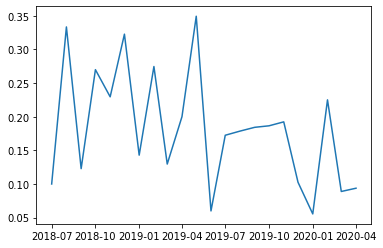

In [56]:
plt.plot(funded_particular_df_1['Month'],(funded_particular_df_1['Uninstall_Rate']))

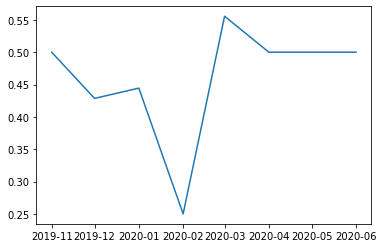

In [58]:
plt.plot(funded_particular_df_1['Month'],funded_particular_df_1['MAU'])

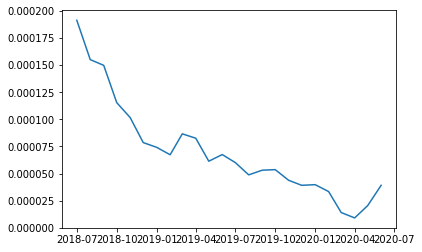

In [59]:
plt.plot(funded_particular_df_1['Month'],funded_particular_df_1['Reach'])

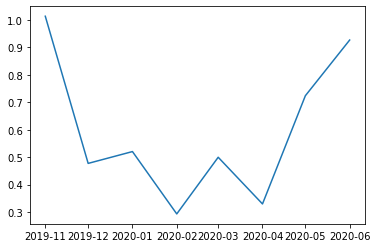

In [62]:
plt.plot(funded_particular_df_1['Month'],funded_particular_df_1['Avg_Session_Time'])